## 1. DATA COLLECTION

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import os
print(os.path.abspath("/content/cover_type.csv"))
with open("/content/cover_type.csv") as f:
    for _ in range(5):
        print(f.readline().strip())


/content/cover_type.csv
Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Aspen
2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,

In [7]:
import pandas as pd

### 1 Download or set the path

In [8]:
csv_path= "/content/cover_type.csv"

###2 Load

In [9]:
data=pd.read_csv(csv_path)

In [10]:
data.shape

(51726, 55)

### 3 Define Columns

In [11]:
NUMERIC_COLS = [
    "Elevation","Aspect","Slope",
    "Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points"
]
WILDERNESS_COLS = [f"Wilderness_Area_{i}" for i in range(1,5)]
SOIL_COLS = [f"Soil_Type_{i}" for i in range(1,41)]
TARGET_COL = "Cover_Type"

In [12]:
ALL_FEATURES = NUMERIC_COLS + WILDERNESS_COLS + SOIL_COLS

In [13]:
print("Numeric columns:", NUMERIC_COLS)
print("Wilderness flags:", WILDERNESS_COLS)
print("Soil flags:", SOIL_COLS)
print("Target column:", TARGET_COL)

Numeric columns: ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
Wilderness flags: ['Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4']
Soil flags: ['Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39', 'Soil_Type_40']
Target c

In [14]:
data.shape

(51726, 55)

### 4 Validate Schema

In [15]:
# Assumes your DataFrame is named df and target is Cover_Type
TARGET_COL = "Cover_Type"

print("Rows, Columns:", data.shape)  # sanity check

# 1) Duplicate records (count only, no dropping)
dup_count = data.duplicated().sum()
print("Duplicate rows count:", dup_count)

# 2) Missing values (per column and total)
missing_per_col = data.isna().sum()
print("Total missing values:", missing_per_col.sum())
print("Top columns by missing values:\n", missing_per_col.sort_values(ascending=False).head(10))

# 3) Class distribution and imbalance flag (read-only)
vc = data[TARGET_COL].value_counts().sort_index()
proportions = (vc / vc.sum()).round(4)
print("Class counts:\n", vc)
print("Class proportions:\n", proportions)

# Simple imbalance heuristic: largest vs smallest class ratio
if vc.min() == 0:
    imbalance_flag = True
else:
    imbalance_flag = (vc.max() / vc.min()) > 1.5
print("Imbalance flag (>1.5x largest/smallest):", imbalance_flag)


Rows, Columns: (51726, 55)
Duplicate rows count: 0
Total missing values: 53
Top columns by missing values:
 Slope                                 1
Vertical_Distance_To_Hydrology        1
Horizontal_Distance_To_Hydrology      1
Horizontal_Distance_To_Roadways       1
Hillshade_9am                         1
Hillshade_3pm                         1
Hillshade_Noon                        1
Soil_Type_2                           1
Soil_Type_3                           1
Horizontal_Distance_To_Fire_Points    1
dtype: int64
Class counts:
 Cover_Type
Aspen                 2416
Cottonwood/Willow     2160
Douglas-fir           2160
Krummholz             2160
Lodgepole Pine       30145
Ponderosa Pine        2160
Spruce/Fir           10524
Name: count, dtype: int64
Class proportions:
 Cover_Type
Aspen                0.0467
Cottonwood/Willow    0.0418
Douglas-fir          0.0418
Krummholz            0.0418
Lodgepole Pine       0.5828
Ponderosa Pine       0.0418
Spruce/Fir           0.2035
Name: count

### 5 Basic Structure

In [16]:
data.shape

(51726, 55)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51726 entries, 0 to 51725
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Elevation                           51726 non-null  int64  
 1   Aspect                              51726 non-null  int64  
 2   Slope                               51725 non-null  float64
 3   Horizontal_Distance_To_Hydrology    51725 non-null  float64
 4   Vertical_Distance_To_Hydrology      51725 non-null  float64
 5   Horizontal_Distance_To_Roadways     51725 non-null  float64
 6   Hillshade_9am                       51725 non-null  float64
 7   Hillshade_Noon                      51725 non-null  float64
 8   Hillshade_3pm                       51725 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  51725 non-null  float64
 10  Wilderness_Area_1                   51725 non-null  float64
 11  Wilderness_Area_2                   51725

### 6 Target columns

In [18]:
print("Target classes (Cover_Type):")
print(data[TARGET_COL].value_counts().sort_index())

Target classes (Cover_Type):
Cover_Type
Aspen                 2416
Cottonwood/Willow     2160
Douglas-fir           2160
Krummholz             2160
Lodgepole Pine       30145
Ponderosa Pine        2160
Spruce/Fir           10524
Name: count, dtype: int64


## 2.DATA UNDERSTANDING

In [19]:
import numpy as np

In [20]:
TARGET_COL = "Cover_Type"

### 1 Numeric summary stats

In [21]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
count,51726.000000,51726.000000,51725.000000,51725.000000,51725.000000,51725.000000,51725.000000,51725.000000,51725.000000,51725.000000,...,51725.000000,51725.000000,51725.000000,51725.000000,51725.000000,51725.000000,51725.000000,51725.000000,51725.000000,51725.000000
mean,2837.183505,141.053938,13.046283,244.729357,40.231281,3287.643789,216.622562,223.544940,138.164021,3573.050498,...,0.006419,0.013340,0.011909,0.000425,0.001972,0.000193,0.000657,0.015524,0.012702,0.010652
std,279.587369,106.321527,7.421566,208.132511,49.626916,1962.165526,24.132900,18.501842,35.003811,1913.445805,...,0.079859,0.114726,0.108478,0.020619,0.044363,0.013903,0.025630,0.123627,0.111985,0.102661
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2684.000000,55.000000,8.000000,85.000000,6.000000,1425.000000,206.000000,215.000000,120.000000,1875.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2861.000000,112.000000,12.000000,192.000000,26.000000,3194.000000,221.000000,226.000000,140.000000,3629.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3021.000000,208.000000,17.000000,360.000000,59.000000,5093.000000,233.000000,236.000000,160.000000,5285.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3849.000000,360.000000,61.000000,1343.000000,554.000000,7117.000000,254.000000,254.000000,248.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 2  Categorical-like summary for indicators

In [22]:
indicator_cols = [c for c in data.columns if c.startswith("Wilderness_Area_") or c.startswith("Soil_Type_")]
display(data[indicator_cols].describe().T.head(10))

,count,mean,std,min,25%,50%,75%,max
Wilderness_Area_1,51725.0,0.777226,0.416112,0.0,1.0,1.0,1.0,1.0
Wilderness_Area_2,51725.0,0.009647,0.097746,0.0,0.0,0.0,0.0,1.0
Wilderness_Area_3,51725.0,0.122745,0.328148,0.0,0.0,0.0,0.0,1.0
Wilderness_Area_4,51725.0,0.090382,0.286731,0.0,0.0,0.0,0.0,1.0
Soil_Type_1,51725.0,0.006863,0.082561,0.0,0.0,0.0,0.0,1.0
Soil_Type_2,51725.0,0.012044,0.109085,0.0,0.0,0.0,0.0,1.0
Soil_Type_3,51725.0,0.018598,0.135103,0.0,0.0,0.0,0.0,1.0
Soil_Type_4,51725.0,0.016298,0.126619,0.0,0.0,0.0,0.0,1.0
Soil_Type_5,51725.0,0.003190,0.056390,0.0,0.0,0.0,0.0,1.0
Soil_Type_6,51725.0,0.012566,0.111395,0.0,0.0,0.0,0.0,1.0


### 3 Target distribution and imbalance check

In [23]:
print("\nTarget classes (Cover_Type) value counts:")
vc = data[TARGET_COL].value_counts().sort_index()
print(vc)
print("\nClass proportions:")
print((vc / vc.sum()).round(4))


Target classes (Cover_Type) value counts:
Cover_Type
Aspen                 2416
Cottonwood/Willow     2160
Douglas-fir           2160
Krummholz             2160
Lodgepole Pine       30145
Ponderosa Pine        2160
Spruce/Fir           10524
Name: count, dtype: int64

Class proportions:
Cover_Type
Aspen                0.0467
Cottonwood/Willow    0.0418
Douglas-fir          0.0418
Krummholz            0.0418
Lodgepole Pine       0.5828
Ponderosa Pine       0.0418
Spruce/Fir           0.2035
Name: count, dtype: float64


### 4 Outlier handling using IQR clipping on numeric columns

In [24]:
data_clean = data.copy()
for col in NUMERIC_COLS:
    q1, q3 = data_clean[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
    data_clean[col] = data_clean[col].clip(lower=low, upper=high)

## 3.DATA CLEANING AND TRANSFORMATION

### 1 Impute missing values on data

In [25]:
data.isnull()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51721,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51722,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51723,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51724,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Keep original 'data' unchanged
data_imp = data.copy()

# Numeric: median (robust)
num_imputer = SimpleImputer(strategy="median")
data_imp[NUMERIC_COLS] = num_imputer.fit_transform(data_imp[NUMERIC_COLS])

# Binary indicators: most_frequent (mode)
bin_imputer = SimpleImputer(strategy="most_frequent")
data_imp[WILDERNESS_COLS] = bin_imputer.fit_transform(data_imp[WILDERNESS_COLS])
data_imp[SOIL_COLS] = bin_imputer.fit_transform(data_imp[SOIL_COLS])

print("Remaining NA in features:", int(data_imp[ALL_FEATURES].isna().sum().sum()))
print("Rows preserved after imputation:", data_imp.shape[0] == data.shape[0])


Remaining NA in features: 0
Rows preserved after imputation: True


### 2  Outlier capping with IQR (numeric only)

In [27]:
import numpy as np

data_clip = data_imp.copy()
for col in NUMERIC_COLS:
    q1, q3 = data_clip[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    low, high = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    data_clip[col] = data_clip[col].clip(lower=low, upper=high)

print("Outlier clipping done (IQR). Rows unchanged:", data_clip.shape[0] == data.shape[0])


Outlier clipping done (IQR). Rows unchanged: True


### 3 Skewness fixes and scaling

In [28]:
from sklearn.preprocessing import PowerTransformer, StandardScaler

# Columns suited for log1p (non-negative distances)
LOG_COLS = [
    "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways",
    "Horizontal_Distance_To_Fire_Points"
]

data_trf = data_clip.copy()

# Safe log1p on distance-like features
for col in LOG_COLS:
    if col in data_trf.columns:
        data_trf[col] = np.log1p(np.clip(data_trf[col], a_min=0, a_max=None))

# Yeo–Johnson on remaining numerics
rest_numeric = [c for c in NUMERIC_COLS if c not in LOG_COLS]
if rest_numeric:
    pt = PowerTransformer(method="yeo-johnson", standardize=False)
    data_trf[rest_numeric] = pt.fit_transform(data_trf[rest_numeric])

# Standardize all numerics
scaler = StandardScaler()
data_trf[NUMERIC_COLS] = scaler.fit_transform(data_trf[NUMERIC_COLS])

print("Skew corrected and numerics scaled. Rows unchanged:", data_trf.shape[0] == data.shape[0])


Skew corrected and numerics scaled. Rows unchanged: True


### 4  Ready-to-model split (stratified)

In [29]:
from sklearn.preprocessing import LabelEncoder

# Handle missing target values by dropping rows
data_trf_cleaned = data_trf.dropna(subset=[TARGET_COL]).copy()
data_trf_cleaned.reset_index(drop=True, inplace=True)

# Encode target
le = LabelEncoder()
y = le.fit_transform(data_trf_cleaned[TARGET_COL]).astype(int)  # 0..6
X = data_trf_cleaned[ALL_FEATURES].copy()

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train shape:", X_train.shape, "Val shape:", X_val.shape)
print("Label classes mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

Train shape: (41380, 54) Val shape: (10345, 54)
Label classes mapping: {'Aspen': np.int64(0), 'Cottonwood/Willow': np.int64(1), 'Douglas-fir': np.int64(2), 'Krummholz': np.int64(3), 'Lodgepole Pine': np.int64(4), 'Ponderosa Pine': np.int64(5), 'Spruce/Fir': np.int64(6)}


In [30]:
data_trf_cleaned

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,-0.918258,-0.776865,-1.776354,0.432711,-1.791817,-1.860105,0.021965,0.400284,0.261916,1.002120,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aspen
1,-0.938215,-0.700242,-2.113605,0.306641,-1.791817,-2.173314,-0.030865,0.609070,0.354157,0.991174,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aspen
2,-0.190451,0.223296,-0.438275,0.457136,0.830694,0.279639,0.779746,0.825969,-0.133510,0.969822,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lodgepole Pine
3,-0.259851,0.359197,0.797944,0.391598,1.199671,0.246054,1.040962,0.825969,-0.521574,0.988320,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lodgepole Pine
4,-0.921588,-0.874801,-2.113605,0.097526,-1.791817,-2.170325,-0.030865,0.538583,0.323370,0.980337,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aspen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51720,0.343094,1.532056,-0.438275,0.717757,0.656911,0.651513,-0.901320,0.134172,0.820624,0.892784,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lodgepole Pine
51721,0.358709,1.409902,0.174302,0.761065,0.771035,0.643454,-1.490672,0.199408,1.391301,0.886830,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lodgepole Pine
51722,0.382180,1.505928,-0.115520,0.800241,0.801575,0.635611,-1.091686,0.006239,0.946443,0.880625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lodgepole Pine
51723,0.382180,1.624279,-0.272183,0.838499,0.830694,0.627441,-0.779785,-0.239677,0.508685,0.874390,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lodgepole Pine


## 4 FEATURE ENGINEERING

In [31]:
# 4) Feature Engineering with pickle-based encoder saving

import numpy as np
import pandas as pd
import pickle
from pathlib import Path
from sklearn.preprocessing import LabelEncoder

MODELS_DIR = Path("models"); MODELS_DIR.mkdir(exist_ok=True)

# 4.1 Optional derived features for interpretability
data_fe = data_trf.copy()

if {"Horizontal_Distance_To_Hydrology","Horizontal_Distance_To_Roadways"}.issubset(data_fe.columns):
    data_fe["Hydrology_Road_Ratio"] = (
        (data_fe["Horizontal_Distance_To_Hydrology"] + 1) /
        (data_fe["Horizontal_Distance_To_Roadways"] + 1)
    )

if {"Hillshade_Noon","Hillshade_3pm"}.issubset(data_fe.columns):
    data_fe["Hillshade_Diff_Noon_3pm"] = data_fe["Hillshade_Noon"] - data_fe["Hillshade_3pm"]

# Update feature lists if engineered columns exist
ENGINEERED_COLS = [c for c in ["Hydrology_Road_Ratio","Hillshade_Diff_Noon_3pm"] if c in data_fe.columns]
NUMERIC_COLS = NUMERIC_COLS + [c for c in ENGINEERED_COLS if c not in NUMERIC_COLS]
ALL_FEATURES = NUMERIC_COLS + WILDERNESS_COLS + SOIL_COLS

print("Engineered columns:", ENGINEERED_COLS)
print("Total features:", len(ALL_FEATURES))

# 4.2 Target encoding (numeric pass-through or LabelEncoder for strings)
y_raw = data_fe[TARGET_COL]

if y_raw.dtype.kind in ("i","u"):
    y = y_raw.astype(int).copy()
    id_to_name = {
        1:"Spruce/Fir",2:"Lodgepole Pine",3:"Ponderosa Pine",
        4:"Cottonwood/Willow",5:"Aspen",6:"Douglas-fir",7:"Krummholz"
    }
    name_to_id = {v:k for k,v in id_to_name.items()}
    encoder_bundle = {"type":"id_map","id_to_name":id_to_name,"name_to_id":name_to_id}
else:
    le = LabelEncoder()
    y = le.fit_transform(y_raw).astype(int)
    id_to_name = {i: name for i, name in enumerate(le.classes_)}
    name_to_id = {name: i for i, name in id_to_name.items()}
    encoder_bundle = {"type":"label_encoder","classes_":list(le.classes_),
                      "id_to_name":id_to_name,"name_to_id":name_to_id}

# 4.3 Final X matrix using engineered features
X = data_fe[ALL_FEATURES].copy()

print("X shape:", X.shape, "| y classes:", sorted(np.unique(y))[:10])

# 4.4 Save encoder with pickle
enc_path = MODELS_DIR / "target_encoder.pkl"
with open(enc_path, "wb") as f:
    pickle.dump(encoder_bundle, f)
print("Saved target encoder:", enc_path)


Engineered columns: ['Hydrology_Road_Ratio', 'Hillshade_Diff_Noon_3pm']
Total features: 56
X shape: (51726, 56) | y classes: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]
Saved target encoder: models/target_encoder.pkl


In [32]:
data.shape

(51726, 55)

In [33]:
# Load encoder and map predicted id -> readable name
import pickle
with open("models/target_encoder.pkl", "rb") as f:
    enc = pickle.load(f)

pred_id =  4
 # example; replace with model.predict(...)
pred_name = enc["id_to_name"].get(int(pred_id), str(pred_id))
print("Predicted name:", pred_name)


Predicted name: Lodgepole Pine


## 5. EDA

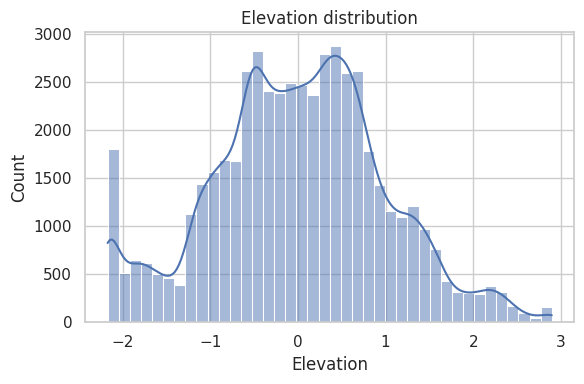

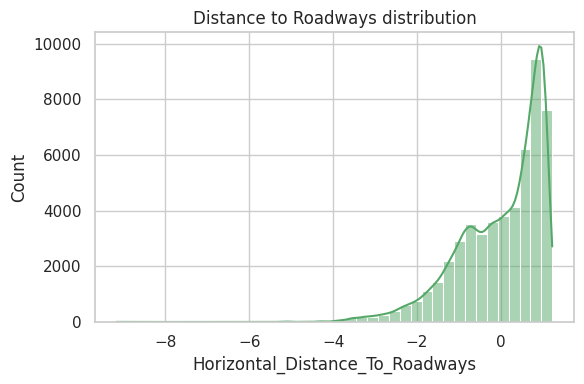

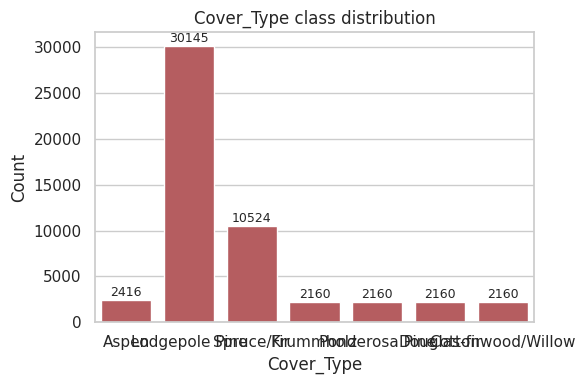

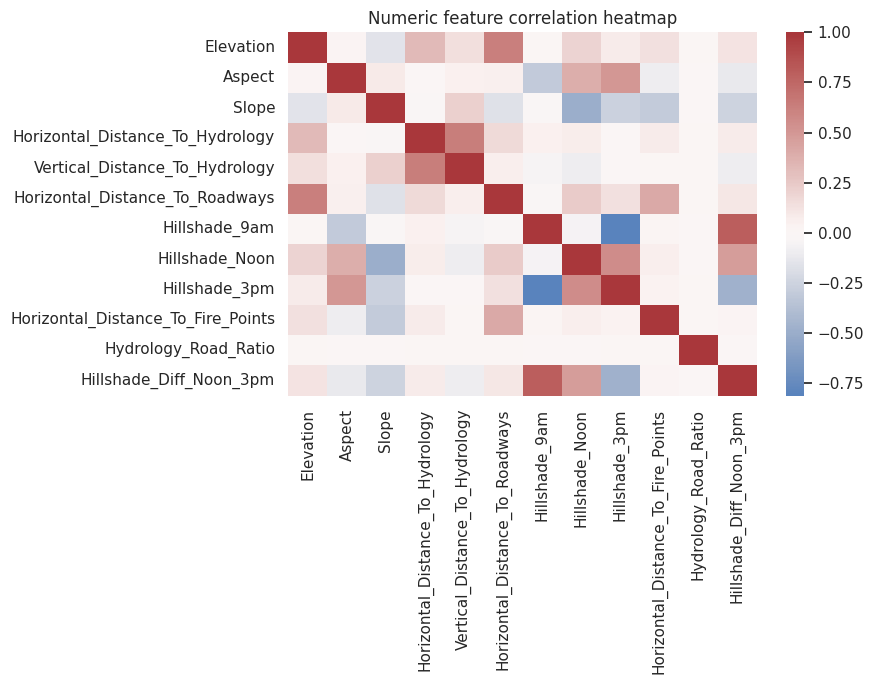

/tmp/ipython-input-1686069615.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=TARGET_COL, y="Elevation", data=df_eda, palette="Set2", fliersize=1)


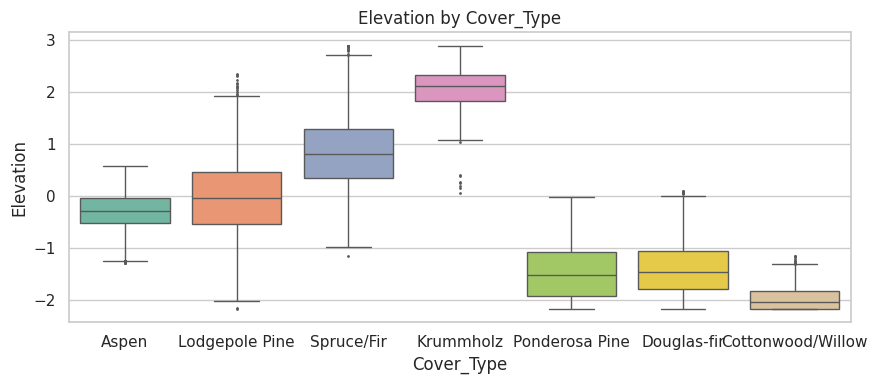

/tmp/ipython-input-1686069615.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=TARGET_COL, y="Horizontal_Distance_To_Hydrology", data=df_eda, palette="Set3", fliersize=1)


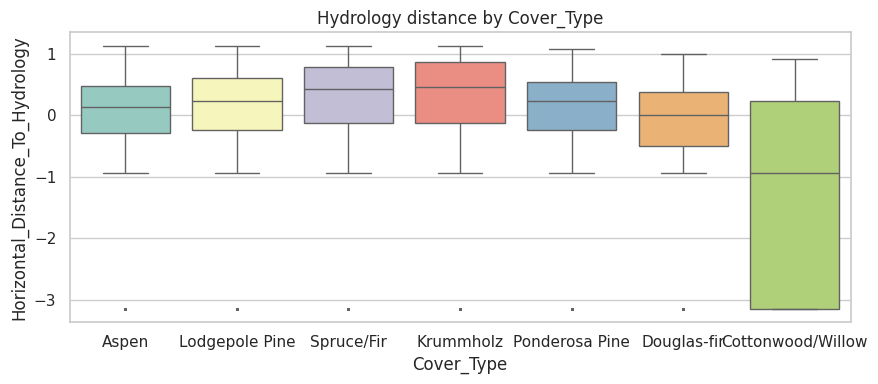

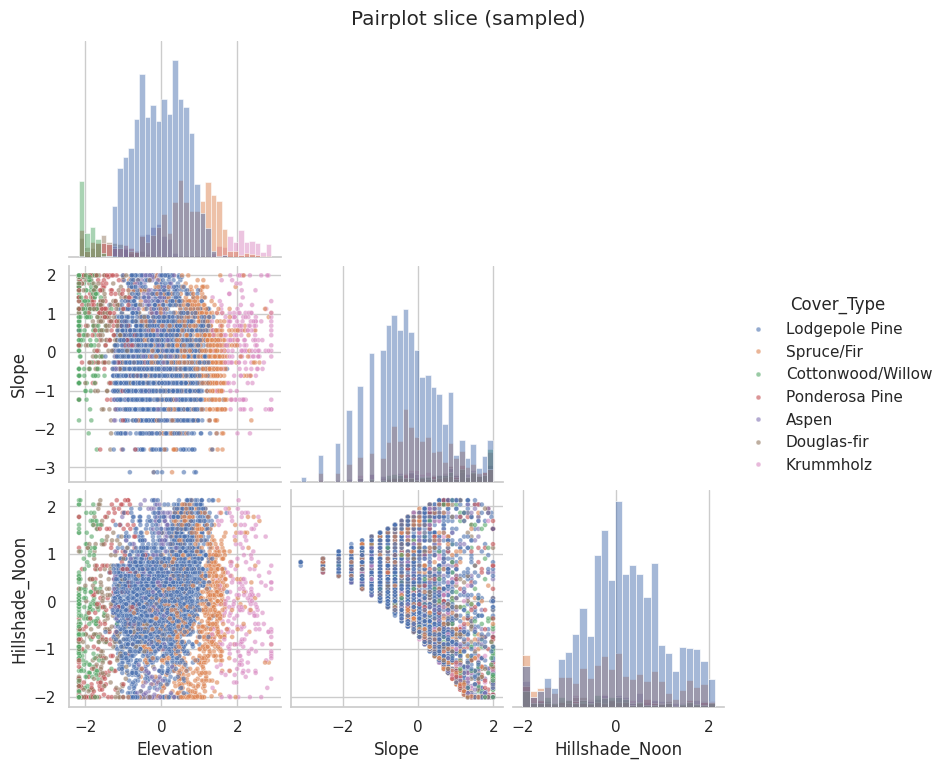

/tmp/ipython-input-1686069615.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, orient="h", palette="Blues_r")


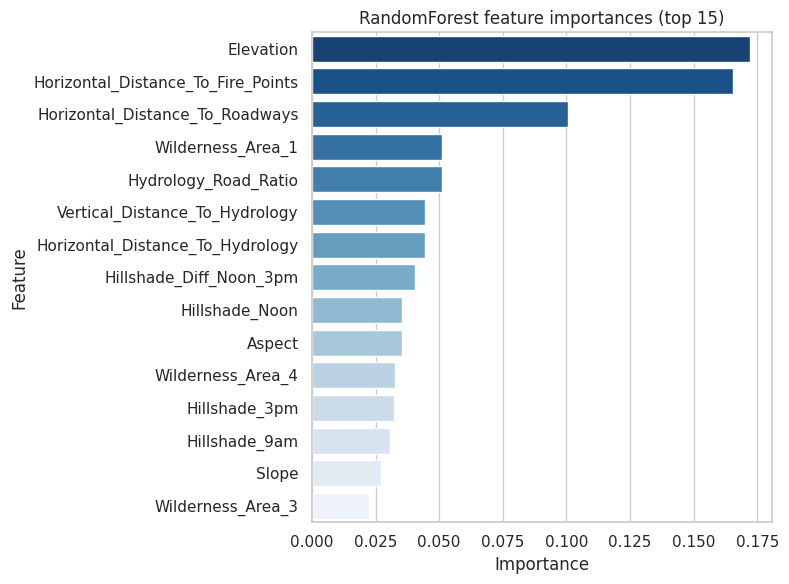

In [34]:
import seaborn as sns, matplotlib.pyplot as plt
sns.set(style="whitegrid", context="notebook")

df_eda = globals().get("data_fe", globals().get("data_trf", data)).copy()

# 1) Histogram: Elevation
plt.figure(figsize=(6,4))
sns.histplot(df_eda["Elevation"], kde=True, bins=40, color="#4C72B0")
plt.title("Elevation distribution"); plt.xlabel("Elevation"); plt.ylabel("Count")
plt.tight_layout(); plt.show(); plt.close()

# 2) Histogram: Distance to Roadways
plt.figure(figsize=(6,4))
sns.histplot(df_eda["Horizontal_Distance_To_Roadways"], kde=True, bins=40, color="#55A868")
plt.title("Distance to Roadways distribution"); plt.xlabel("Horizontal_Distance_To_Roadways"); plt.ylabel("Count")
plt.tight_layout(); plt.show(); plt.close()

# 3) Class imbalance bar plot
plt.figure(figsize=(6,4))
ax = sns.countplot(x=TARGET_COL, data=df_eda, color="#C44E52")
plt.title("Cover_Type class distribution"); plt.xlabel("Cover_Type"); plt.ylabel("Count")
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='baseline', fontsize=9, xytext=(0,3), textcoords='offset points')
plt.tight_layout(); plt.show(); plt.close()

# 4) Correlation heatmap
num_cols_for_heatmap = [c for c in NUMERIC_COLS if c in df_eda.columns]
plt.figure(figsize=(9,7))
corr = df_eda[num_cols_for_heatmap].corr()
sns.heatmap(corr, cmap="vlag", center=0, annot=False, fmt=".2f")
plt.title("Numeric feature correlation heatmap")
plt.tight_layout(); plt.show(); plt.close()

# 5) Boxplot: Elevation by Cover_Type
plt.figure(figsize=(9,4))
sns.boxplot(x=TARGET_COL, y="Elevation", data=df_eda, palette="Set2", fliersize=1)
plt.title("Elevation by Cover_Type"); plt.xlabel("Cover_Type"); plt.ylabel("Elevation")
plt.tight_layout(); plt.show(); plt.close()

# 6) Boxplot: Hydrology distance by Cover_Type
plt.figure(figsize=(9,4))
sns.boxplot(x=TARGET_COL, y="Horizontal_Distance_To_Hydrology", data=df_eda, palette="Set3", fliersize=1)
plt.title("Hydrology distance by Cover_Type"); plt.xlabel("Cover_Type"); plt.ylabel("Horizontal_Distance_To_Hydrology")
plt.tight_layout(); plt.show(); plt.close()

# 7) Pairplot slice (Seaborn manages its own figure)
pair_cols = [c for c in ["Elevation","Slope","Hillshade_Noon", TARGET_COL] if c in df_eda.columns]
sample_df = df_eda[pair_cols].sample(min(5000, len(df_eda)), random_state=42)
g = sns.pairplot(sample_df, hue=TARGET_COL, corner=True, diag_kind="hist",
                 plot_kws=dict(s=12, alpha=0.6), diag_kws=dict(fill=True))
g.fig.suptitle("Pairplot slice (sampled)", y=1.02)
plt.show(); plt.close()

# 8) Feature importances
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd, numpy as np

# Ensure target has no NaNs for feature importance calculation
df_eda_for_fi = df_eda.dropna(subset=[TARGET_COL]).copy()

# Build mixed feature matrix (numerics + indicators)
X_imp = df_eda_for_fi[[c for c in df_eda_for_fi.columns if c != TARGET_COL and c in set(NUMERIC_COLS)]].copy()
binary_cols = [c for c in df_eda_for_fi.columns if c.startswith("Wilderness_Area_") or c.startswith("Soil_Type_")]
X_imp = pd.concat([X_imp, df_eda_for_fi[binary_cols]], axis=1)

y_imp_raw = df_eda_for_fi[TARGET_COL]
if y_imp_raw.dtype.kind in ("i","u"):
    y_imp = y_imp_raw.astype(int).values
else:
    from sklearn.preprocessing import LabelEncoder
    le_imp = LabelEncoder()
    y_imp = le_imp.fit_transform(y_imp_raw).astype(int)

# Subsample for speed (optional)
idx = np.random.RandomState(42).choice(len(X_imp), size=min(25000, len(X_imp)), replace=False)
X_sub = X_imp.iloc[idx]
y_sub = y_imp[idx]

X_tr, X_te, y_tr, y_te = train_test_split(X_sub, y_sub, test_size=0.2, stratify=y_sub, random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_tr, y_tr)

importances = pd.Series(rf.feature_importances_, index=X_tr.columns).sort_values(ascending=False).head(15)

plt.figure(figsize=(8,6))
sns.barplot(x=importances.values, y=importances.index, orient="h", palette="Blues_r")
plt.title("RandomForest feature importances (top 15)")
plt.xlabel("Importance"); plt.ylabel("Feature")
plt.tight_layout(); plt.show(); plt.close()

## 6 CLASS IMBALANCE HANDLING

### RandomOverSampler

In [35]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

print("Before ROS:", dict(Counter(y_train)))
ros = RandomOverSampler(random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train, y_train)
print("After ROS:", dict(Counter(y_train_bal)))

# Use X_train_bal, y_train_bal for model training; keep X_val, y_val unchanged for evaluation


Before ROS: {np.int64(3): 1728, np.int64(5): 1728, np.int64(4): 24116, np.int64(6): 8419, np.int64(2): 1728, np.int64(0): 1933, np.int64(1): 1728}
After ROS: {np.int64(3): 24116, np.int64(5): 24116, np.int64(4): 24116, np.int64(6): 24116, np.int64(2): 24116, np.int64(0): 24116, np.int64(1): 24116}


In [36]:
print("Train shapes -> original:", X_train.shape, "balanced:", X_train_bal.shape)
assert X_train_bal.shape[0] == len(y_train_bal)


Train shapes -> original: (41380, 54) balanced: (168812, 54)


In [37]:
from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder

# Ensure data_fe (which contains engineered features) is cleaned for target NaNs
data_fe_cleaned = data_fe.dropna(subset=[TARGET_COL]).copy()

# 1) Encode target
le_recreate = LabelEncoder()
y_clean = le_recreate.fit_transform(data_fe_cleaned[TARGET_COL]).astype(int)

# 2) Create X_clean using the cleaned data_fe and ALL_FEATURES
X_clean = data_fe_cleaned[ALL_FEATURES].copy()

# 3) Split first
X_train, X_val, y_train, y_val = train_test_split(X_clean, y_clean, test_size=0.2, stratify=y_clean, random_state=42)
print("Before:", Counter(y_train))

# 4) Oversample only training set
ros = RandomOverSampler(random_state=42)          # or sampling_strategy='auto'
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)
print("After:", Counter(y_train_res))

# 5) Sanity: sizes
print("Original train size:", len(y_train))
print("Resampled train size:", len(y_train_res))
print("Validation size (unchanged):", len(y_val))

Before: Counter({np.int64(4): 24116, np.int64(6): 8419, np.int64(0): 1933, np.int64(3): 1728, np.int64(5): 1728, np.int64(2): 1728, np.int64(1): 1728})
After: Counter({np.int64(3): 24116, np.int64(5): 24116, np.int64(4): 24116, np.int64(6): 24116, np.int64(2): 24116, np.int64(0): 24116, np.int64(1): 24116})
Original train size: 41380
Resampled train size: 168812
Validation size (unchanged): 10345


In [38]:
data_fe_cleaned.shape

(51725, 57)

## 7. FEATURE SELECTION

### 1 Correlation-based pruning (numeric only)

In [39]:
import numpy as np
import pandas as pd

# Use your cleaned/transformed DataFrame (or engineered) for numeric evaluation
df_sel = globals().get("data_fe", globals().get("data_trf", data)).copy()

num_cols = [c for c in NUMERIC_COLS if c in df_sel.columns]
corr = df_sel[num_cols].corr().abs()

# Upper triangle mask
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# Drop one of each pair with correlation above threshold
CORR_THRESH = 0.90
to_drop_corr = [column for column in upper.columns if any(upper[column] > CORR_THRESH)]
print("Highly correlated numeric columns to consider dropping:", to_drop_corr)


Highly correlated numeric columns to consider dropping: []


### 2 Random Forest feature importances (mixed features)

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Build mixed feature matrix (numerics + indicators)
bin_cols = [c for c in df_sel.columns if c.startswith("Wilderness_Area_") or c.startswith("Soil_Type_")]
X_imp = pd.concat([df_sel[[c for c in num_cols]], df_sel[bin_cols]], axis=1)

# Encode target (works for numeric or string)
y_raw = df_sel[TARGET_COL]
if y_raw.dtype.kind in ("i","u"):
    y_imp = y_raw.astype(int).values
else:
    from sklearn.preprocessing import LabelEncoder
    le_fs = LabelEncoder()
    y_imp = le_fs.fit_transform(y_raw).astype(int)

# Subsample for speed (optional)
idx = np.random.RandomState(42).choice(len(X_imp), size=min(25000, len(X_imp)), replace=False)
X_sub = X_imp.iloc[idx]
y_sub = y_imp[idx]

X_tr, X_te, y_tr, y_te = train_test_split(X_sub, y_sub, test_size=0.2, stratify=y_sub, random_state=42)

rf_fs = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
rf_fs.fit(X_tr, y_tr)

importances = pd.Series(rf_fs.feature_importances_, index=X_tr.columns).sort_values(ascending=False)
top20 = importances.head(20)
bottom20 = importances.tail(20)

print("Top 10 important features:\n", top20.head(10))
print("Least 10 important features:\n", bottom20.head(10))

# Candidate drops: low-importance binary indicators and correlated numerics
LOW_IMPORTANCE_THRESH = importances.quantile(0.20)  # bottom 20% as example
low_imp_candidates = list(importances[importances <= LOW_IMPORTANCE_THRESH].index)
print("Low-importance candidates (<=20th percentile):", len(low_imp_candidates))


Top 10 important features:
 Elevation                             0.171601
Horizontal_Distance_To_Fire_Points    0.165710
Horizontal_Distance_To_Roadways       0.099722
Wilderness_Area_1                     0.053592
Hydrology_Road_Ratio                  0.051727
Vertical_Distance_To_Hydrology        0.044090
Horizontal_Distance_To_Hydrology      0.043959
Hillshade_Diff_Noon_3pm               0.040181
Aspect                                0.035076
Hillshade_Noon                        0.034897
dtype: float64
Least 10 important features:
 Soil_Type_11    0.001221
Soil_Type_18    0.001067
Soil_Type_31    0.001015
Soil_Type_35    0.000814
Soil_Type_19    0.000760
Soil_Type_1     0.000741
Soil_Type_5     0.000526
Soil_Type_37    0.000328
Soil_Type_14    0.000295
Soil_Type_26    0.000239
dtype: float64
Low-importance candidates (<=20th percentile): 12


### 3 Statistical tests

In [42]:
from scipy import stats
import pandas as pd # Import pandas for pd.notna

# ANOVA across all classes for a few key numerics
anova_cols = [c for c in ["Elevation","Slope","Horizontal_Distance_To_Hydrology"] if c in df_sel.columns]
for col in anova_cols:
    # Filter out NaN from unique target values before sorting
    unique_target_values = [x for x in df_sel[TARGET_COL].unique() if pd.notna(x)]
    groups = [df_sel.loc[df_sel[TARGET_COL]==k, col].values for k in sorted(unique_target_values)]
    # Ensure non-empty groups
    groups = [g for g in groups if len(g) > 1]
    if len(groups) >= 2:
        F, p = stats.f_oneway(*groups)
        print(f"ANOVA {col}: F={F:.3f}, p={p:.3e}")

# Chi-square for indicator features (use a couple to illustrate, or loop over all)
from pandas import crosstab

chi_cols = [c for c in bin_cols[:10]]  # first 10 for brevity; expand if desired
for col in chi_cols:
    ct = crosstab(df_sel[col], df_sel[TARGET_COL])
    chi2, p, dof, ex = stats.chi2_contingency(ct)
    print(f"Chi-square {col}: chi2={chi2:.2f}, p={p:.3e}, dof={dof}")

# Optional: t-test comparing a numeric feature between two classes (e.g., class 1 vs class 2)
if df_sel[TARGET_COL].nunique() >= 2:
    # Filter out NaN from unique target values before sorting
    unique_target_values = [x for x in df_sel[TARGET_COL].unique() if pd.notna(x)]
    # Ensure there are at least two valid classes after filtering
    if len(unique_target_values) >= 2:
        c1, c2 = sorted(unique_target_values)[:2]
        col = "Elevation" if "Elevation" in df_sel.columns else num_cols[0]
        g1 = df_sel.loc[df_sel[TARGET_COL]==c1, col]
        g2 = df_sel.loc[df_sel[TARGET_COL]==c2, col]
        t, p = stats.ttest_ind(g1, g2, equal_var=False, nan_policy="omit")
        print(f"t-test {col} (class {c1} vs {c2}): t={t:.3f}, p={p:.3e}")
    else:
        print("Not enough unique target classes (after dropping NaNs) for t-test.")

ANOVA Elevation: F=15739.849, p=0.000e+00
ANOVA Slope: F=1004.408, p=0.000e+00
ANOVA Horizontal_Distance_To_Hydrology: F=833.332, p=0.000e+00
Chi-square Wilderness_Area_1: chi2=34501.40, p=0.000e+00, dof=6
Chi-square Wilderness_Area_2: chi2=2914.30, p=0.000e+00, dof=6
Chi-square Wilderness_Area_3: chi2=15481.62, p=0.000e+00, dof=6
Chi-square Wilderness_Area_4: chi2=38688.85, p=0.000e+00, dof=6
Chi-square Soil_Type_1: chi2=2562.30, p=0.000e+00, dof=6
Chi-square Soil_Type_2: chi2=4247.35, p=0.000e+00, dof=6
Chi-square Soil_Type_3: chi2=15669.59, p=0.000e+00, dof=6
Chi-square Soil_Type_4: chi2=6468.10, p=0.000e+00, dof=6
Chi-square Soil_Type_5: chi2=1230.30, p=1.322e-262, dof=6
Chi-square Soil_Type_6: chi2=4708.57, p=0.000e+00, dof=6
t-test Elevation (class Aspen vs Cottonwood/Willow): t=177.612, p=0.000e+00


### 4 Build final feature list to use

In [43]:
# Conservative union: correlated numerics + very low-importance features
candidate_drop = set(to_drop_corr).union(set(low_imp_candidates))

# Keep: all features minus candidate_drop (only those that actually exist in your design matrix)
final_features = [c for c in (NUMERIC_COLS + bin_cols) if c not in candidate_drop]
print("Final feature count:", len(final_features))

# Build X_final using df_sel; y_final as encoded target
X_final = df_sel[final_features].copy()

# Reuse the same encoding approach as earlier
from sklearn.preprocessing import LabelEncoder
le_final = LabelEncoder()
y_final = le_final.fit_transform(df_sel[TARGET_COL]).astype(int)

print("X_final shape:", X_final.shape, "| Classes:", sorted(np.unique(y_final)))


Final feature count: 44
X_final shape: (51726, 44) | Classes: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]


### 8 MODEL BUILDING

In [44]:
# Select training arrays: use oversampled if present, else original
# Ensure consistency by using the latest split and oversampled data which includes engineered features
Xtr = X_train_res
ytr = y_train_res
Xva, yva = X_val, y_val

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

### 1 Decision Tree

DecisionTree Accuracy: 0.9162
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       483
           1       0.91      0.93      0.92       432
           2       0.76      0.75      0.76       432
           3       0.92      0.93      0.92       432
           4       0.95      0.96      0.96      6029
           5       0.73      0.72      0.72       432
           6       0.90      0.88      0.89      2105

    accuracy                           0.92     10345
   macro avg       0.86      0.86      0.86     10345
weighted avg       0.92      0.92      0.92     10345



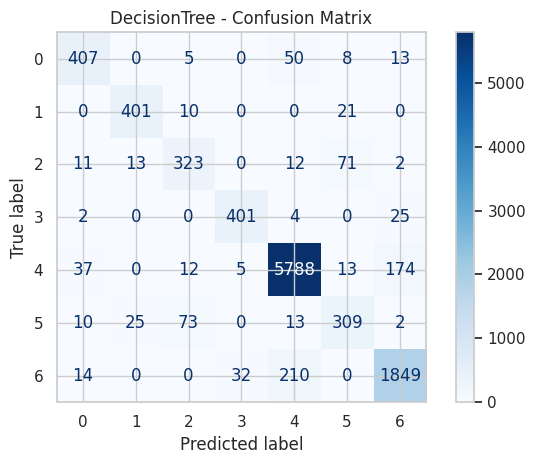

In [45]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(Xtr, ytr)
pred = dt.predict(Xva)
print("DecisionTree Accuracy:", f"{accuracy_score(yva, pred):.4f}")
print(classification_report(yva, pred, zero_division=0))
ConfusionMatrixDisplay(confusion_matrix(yva, pred)).plot(cmap="Blues")
plt.title("DecisionTree - Confusion Matrix"); plt.tight_layout(); plt.show(); plt.close()


### 2 Random Forest

RandomForest Accuracy: 0.9386
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       483
           1       0.93      0.96      0.94       432
           2       0.82      0.85      0.84       432
           3       0.95      0.97      0.96       432
           4       0.97      0.96      0.96      6029
           5       0.83      0.83      0.83       432
           6       0.91      0.90      0.91      2105

    accuracy                           0.94     10345
   macro avg       0.90      0.92      0.91     10345
weighted avg       0.94      0.94      0.94     10345



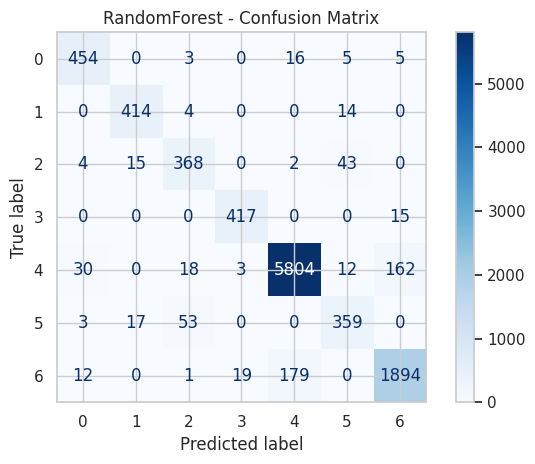

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
rf.fit(Xtr, ytr)
pred = rf.predict(Xva)
print("RandomForest Accuracy:", f"{accuracy_score(yva, pred):.4f}")
print(classification_report(yva, pred, zero_division=0))
ConfusionMatrixDisplay(confusion_matrix(yva, pred)).plot(cmap="Blues")
plt.title("RandomForest - Confusion Matrix"); plt.tight_layout(); plt.show(); plt.close()


### 3 Logistic Regression

LogisticRegression Accuracy: 0.7106
              precision    recall  f1-score   support

           0       0.36      0.79      0.50       483
           1       0.82      0.88      0.85       432
           2       0.62      0.64      0.63       432
           3       0.76      0.96      0.85       432
           4       0.88      0.71      0.78      6029
           5       0.59      0.58      0.58       432
           6       0.54      0.65      0.59      2105

    accuracy                           0.71     10345
   macro avg       0.65      0.74      0.68     10345
weighted avg       0.75      0.71      0.72     10345



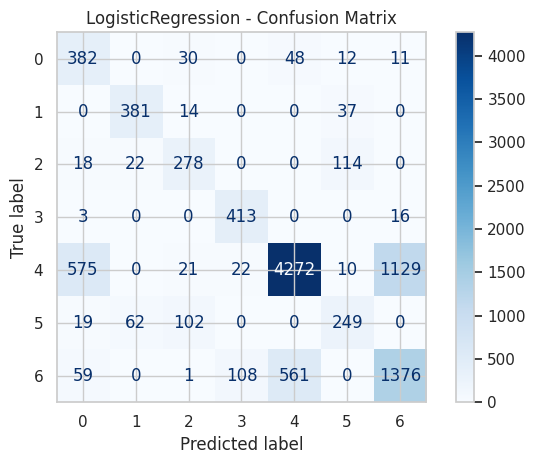

In [47]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, n_jobs=-1)
lr.fit(Xtr, ytr)
pred = lr.predict(Xva)
print("LogisticRegression Accuracy:", f"{accuracy_score(yva, pred):.4f}")
print(classification_report(yva, pred, zero_division=0))
ConfusionMatrixDisplay(confusion_matrix(yva, pred)).plot(cmap="Blues")
plt.title("LogisticRegression - Confusion Matrix"); plt.tight_layout(); plt.show(); plt.close()


### 4 K-Nearest Neighbors (KNN)

KNN Accuracy: 0.8471
              precision    recall  f1-score   support

           0       0.60      0.93      0.73       483
           1       0.81      0.91      0.86       432
           2       0.68      0.79      0.73       432
           3       0.78      0.97      0.87       432
           4       0.96      0.85      0.90      6029
           5       0.69      0.72      0.71       432
           6       0.76      0.82      0.79      2105

    accuracy                           0.85     10345
   macro avg       0.75      0.86      0.80     10345
weighted avg       0.86      0.85      0.85     10345



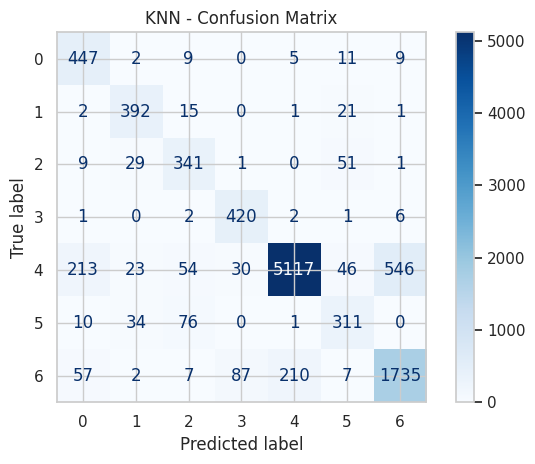

In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15, weights="distance")
knn.fit(Xtr, ytr)
pred = knn.predict(Xva)
print("KNN Accuracy:", f"{accuracy_score(yva, pred):.4f}")
print(classification_report(yva, pred, zero_division=0))
ConfusionMatrixDisplay(confusion_matrix(yva, pred)).plot(cmap="Blues")
plt.title("KNN - Confusion Matrix"); plt.tight_layout(); plt.show(); plt.close()


### 5  XGBoost

XGBoost Accuracy: 0.9385
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       483
           1       0.94      0.96      0.95       432
           2       0.82      0.87      0.84       432
           3       0.94      0.97      0.96       432
           4       0.98      0.95      0.96      6029
           5       0.84      0.82      0.83       432
           6       0.89      0.93      0.91      2105

    accuracy                           0.94     10345
   macro avg       0.89      0.92      0.91     10345
weighted avg       0.94      0.94      0.94     10345



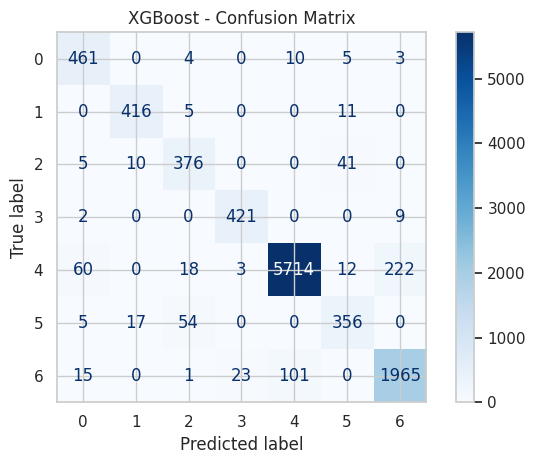

In [49]:
try:
    from xgboost import XGBClassifier
    xgb = XGBClassifier(
        n_estimators=400, learning_rate=0.05, max_depth=8,
        subsample=0.8, colsample_bytree=0.8, random_state=42,
        tree_method="hist", n_jobs=-1, eval_metric="mlogloss"
    )
    xgb.fit(Xtr, ytr)
    pred = xgb.predict(Xva)
    print("XGBoost Accuracy:", f"{accuracy_score(yva, pred):.4f}")
    print(classification_report(yva, pred, zero_division=0))
    ConfusionMatrixDisplay(confusion_matrix(yva, pred)).plot(cmap="Blues")
    plt.title("XGBoost - Confusion Matrix"); plt.tight_layout(); plt.show(); plt.close()
except Exception as e:
    print("XGBoost not available in this environment:", e)


### Hypermeter Tuning

Search subset: (60000, 56)
Fitting 2 folds for each of 8 candidates, totalling 16 fits
Best CV accuracy: 0.95095
Best params: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 271}

Tuned RF Validation Accuracy: 0.9076
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       483
           1       0.91      0.97      0.93       432
           2       0.79      0.84      0.81       432
           3       0.92      0.97      0.94       432
           4       0.96      0.92      0.94      6029
           5       0.83      0.79      0.81       432
           6       0.84      0.87      0.86      2105

    accuracy                           0.91     10345
   macro avg       0.86      0.90      0.88     10345
weighted avg       0.91      0.91      0.91     10345



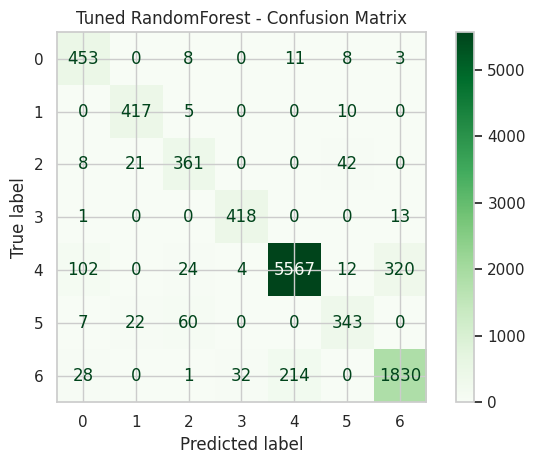

In [50]:
# ===== Fast, robust Random Forest RandomizedSearchCV (fixed indexing, no stray tokens) =====
import numpy as np
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Use balanced training if available
# Ensure Xtr, ytr, X_val_current, y_val_current are using the fully engineered features
# Re-filtering here to ensure consistency, in case upstream variables are not perfectly aligned.
Xtr_full = globals().get("X_train_res")
ytr_full = globals().get("y_train_res")
Xva_full = globals().get("X_val")
yva_full = globals().get("y_val")

# Explicitly select features present in ALL_FEATURES for consistency
# Assuming ALL_FEATURES is the global list of 56 features
if Xtr_full is not None and Xva_full is not None and 'ALL_FEATURES' in globals():
    # Ensure only features from ALL_FEATURES are present in Xtr_full and Xva_full
    Xtr = Xtr_full[ALL_FEATURES].copy() if set(ALL_FEATURES).issubset(Xtr_full.columns) else Xtr_full
    Xva = Xva_full[ALL_FEATURES].copy() if set(ALL_FEATURES).issubset(Xva_full.columns) else Xva_full
    ytr = ytr_full
    yva = yva_full
else:
    # Fallback if full variables or ALL_FEATURES are not found
    print("Warning: Could not retrieve full feature sets. Using available X_train/X_val.")
    Xtr = globals().get("X_train_bal", X_train)
    ytr = globals().get("y_train_bal", y_train)
    Xva, yva = X_val, y_val


# 1) Subset for search (use iloc for DataFrame; direct indexing for ndarray)
SUBSET = 60000  # shrink if session is slow; set None to disable
if SUBSET and len(Xtr) > SUBSET:
    rs = np.random.RandomState(42)
    idx = rs.choice(len(Xtr), size=SUBSET, replace=False)
    if hasattr(Xtr, "iloc"):
        Xtr_s = Xtr.iloc[idx]
    else:
        Xtr_s = Xtr[idx]
    ytr_s = ytr[idx]
    print("Search subset:", Xtr_s.shape)
else:
    Xtr_s, ytr_s = Xtr, ytr

# 2) Tighter search space and shallower trees to avoid timeouts
param_dist = {
    "n_estimators": randint(150, 400),
    "max_depth": randint(8, 18),
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 5),
    "max_features": ["sqrt", "log2"],
}

# Base estimator with n_jobs=1 so CV doesn't spawn too many workers per fit
rf_base = RandomForestClassifier(random_state=42, n_jobs=1)
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=8,                 # small, fast search; increase later if needed
    scoring="accuracy",
    cv=cv,
    n_jobs=-1,                # parallelize across candidates (safe since base has n_jobs=1)
    verbose=1,
    random_state=42
)

search.fit(Xtr_s, ytr_s)
print("Best CV accuracy:", search.best_score_)
print("Best params:", search.best_params_)

# 3) Refit tuned RF on full training with n_jobs=-1 for speed
best_params = search.best_params_
rf_tuned = RandomForestClassifier(random_state=42, n_jobs=-1, **best_params)
rf_tuned.fit(Xtr, ytr)

# 4) Final validation
pred = rf_tuned.predict(Xva)
acc = accuracy_score(yva, pred)
print("\nTuned RF Validation Accuracy:", f"{acc:.4f}")
print(classification_report(yva, pred, zero_division=0))
ConfusionMatrixDisplay(confusion_matrix(yva, pred)).plot(cmap="Greens")
plt.title("Tuned RandomForest - Confusion Matrix")
plt.tight_layout(); plt.show(); plt.close()

## 9 FINALIZE AND SAVE BEST MODEL


In [51]:
import pickle
from pathlib import Path

# Choose which model to save: use your tuned model variable (e.g., rf_tuned or tuned_model)
best_model = globals().get("rf_tuned", globals().get("tuned_model", None))
if best_model is None:
    raise ValueError("No tuned/best model found. Train your best model and set rf_tuned or tuned_model.")

# Feature lists you used during training (ensure these exist)
NUMERIC_LIST = NUMERIC_COLS
WILDERNESS_LIST = WILDERNESS_COLS
SOIL_LIST = SOIL_COLS
FEATURES = NUMERIC_LIST + WILDERNESS_LIST + SOIL_LIST

MODELS_DIR = Path("models"); MODELS_DIR.mkdir(exist_ok=True)

bundle = {
    "model": best_model,           # fitted sklearn estimator/pipeline
    "features": FEATURES,          # exact feature order expected
    "numeric_cols": NUMERIC_LIST,
    "wilderness_cols": WILDERNESS_LIST,
    "soil_cols": SOIL_LIST,
}

with open(MODELS_DIR / "best_model.pkl", "wb") as f:
    pickle.dump(bundle, f)

print("Saved:", MODELS_DIR / "best_model.pkl")


Saved: models/best_model.pkl


In [53]:
# Create folders
import pathlib, os
pathlib.Path("models").mkdir(exist_ok=True)
print("Working dir:", os.getcwd())
print("Folders:", os.listdir())


Working dir: /content
Folders: ['.config', 'drive', 'cover_type.csv', 'models', 'sample_data']


## 10 BUILD A STREAMLIT UI

In [54]:
from google.colab import files

# Upload app.py to /content
uploaded = files.upload()  # choose your local app.py

# Upload pickles into models/
print("Upload pickles next...")
%cd /content/models
uploaded = files.upload()  # choose best_model.pkl and target_encoder.pkl
%cd /content


Saving project3_Forestcover classification.py to project3_Forestcover classification.py
Upload pickles next...
/content/models


Saving settings.json to settings.json
/content


In [55]:
import os
print("Root files:", os.listdir("/content"))
print("Models:", os.listdir("/content/models"))


Root files: ['.config', 'drive', 'project3_Forestcover classification.py', 'cover_type.csv', 'models', 'sample_data']
Models: ['settings.json', 'best_model.pkl', 'target_encoder.pkl']


In [56]:
# Create a minimal requirements.txt in /content
with open("requirements.txt", "w") as f:
    f.write("""streamlit>=1.26
scikit-learn>=1.3
pandas>=1.5
numpy>=1.23
xgboost>=1.7
""")
!pip -q install -r requirements.txt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 89.3 MB/s eta 0:00:00


In [57]:
# Write a minimal app to /content/app.py (run this once)
app_code = """
import streamlit as st

st.set_page_config(page_title='EcoType Demo', page_icon='🌲', layout='centered')
st.title('EcoType: Forest Cover Type Prediction')

st.write('This is a minimal Streamlit app. Use the form below and click Predict.')
val = st.number_input('Elevation', value=2500.0, step=1.0)
if st.button('Predict'):
    st.success(f'Demo OK. You entered Elevation={val}.')
"""
with open("app.py","w") as f:
    f.write(app_code)

import os
print("app.py exists:", os.path.exists("app.py"))


app.py exists: True


In [60]:
import subprocess, time, re
tp = subprocess.Popen(
    ["./cloudflared", "tunnel", "--url", "http://localhost:8501"],
    stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True, bufsize=1
)
public_url = None
start = time.time()
while time.time() - start < 60:  # wait up to 60s
    line = tp.stdout.readline()
    if not line: continue
    print(line.strip())
    m = re.search(r"https://[^\s]*trycloudflare\.com", line)
    if m:
        public_url = m.group(0)
        break
if public_url:
    print("\nOpen this in a new tab:\n", public_url)
else:
    print("Did not detect a public URL. Rerun this cell or try LocalTunnel.")


2025-11-23T07:17:13Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. However, be aware that these account-less Tunnels have no uptime guarantee, are subject to the Cloudflare Online Services Terms of Use (https://www.cloudflare.com/website-terms/), and Cloudflare reserves the right to investigate your use of Tunnels for violations of such terms. If you intend to use Tunnels in production you should use a pre-created named tunnel by following: https://developers.cloudflare.com/cloudflare-one/connections/connect-apps
2025-11-23T07:17:13Z INF Requesting new quick Tunnel on trycloudflare.com...
2025-11-23T07:17:18Z INF +--------------------------------------------------------------------------------------------+
2025-11-23T07:17:18Z INF |  Your quick Tunnel has been created! Visit it at (it may take some time to be reachable):  |
2025-11-23T07:17:18Z INF |  https://systematic-northeast-pros-bite.trycloudflare.